In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pandas as pd
from astropy.io import fits
import seaborn as sns
import pcmdpy as ppy
%matplotlib inline

In [26]:
hdu = fits.open('../data/M87/reduced/M87_F814W_drc.fits')
hdu2 = fits.open('../data/M87/reduced/M87_F606W_drc.fits')

In [3]:
hdu.info()

Filename: ../data/M87/reduced/M87_F814W_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     985   ()      
  1  SCI           1 ImageHDU        81   (5133, 5115)   float32   
  2  REGIONS       1 ImageHDU        11   (5133, 5115)   int32   
  3  MASKED        1 ImageHDU        81   (5133, 5115)   float32   
  4  MASKEDSUB     1 ImageHDU        14   (5133, 5115)   float64   
  5  WHT           1 ImageHDU        46   (5133, 5115)   float32   
  6  CTX           1 ImageHDU        39   (5133, 5115)   int32   
  7  FLAGS         1 ImageHDU        26   (5133, 5115)   int32   
  8  BKGDSUB       1 ImageHDU        14   (5133, 5115)   float64   
  9  BKGDRMS       1 ImageHDU        14   (5133, 5115)   float64   
 10  BKGD          1 ImageHDU        14   (5133, 5115)   float64   
 11  HDRTAB        1 BinTableHDU    631   16R x 311C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, 

In [28]:
mask = (hdu['REGIONS'].data == 104)
flux = hdu['SCI'].data[mask]
exp = hdu['WHT'].data[mask]

In [29]:
mask2 = (hdu2['REGIONS'].data == 104)
flux2 = hdu2['SCI'].data[mask2]
exp2 = hdu2['WHT'].data[mask2]

In [30]:
f = ppy.instrument.default_m87_filters()

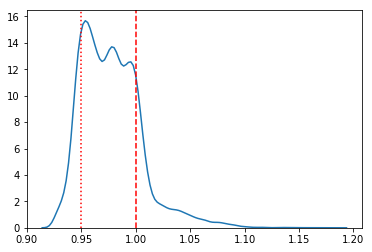

In [31]:
ax = sns.kdeplot(exp/f[0]._exposure)
ax.axvline(x=1.0, ls='--', color='r')
ax.axvline(x=0.95, ls=':', color='r')


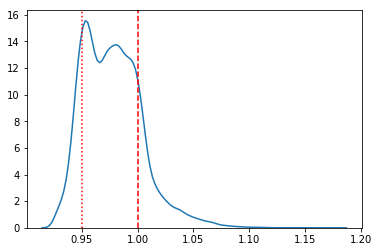

In [32]:
ax = sns.kdeplot(exp2/f[1]._exposure)
ax.axvline(x=1.0, ls='--', color='r')
ax.axvline(x=0.95, ls=':', color='r')


In [10]:
mags1 = f.counts_to_mag(flux, mag_system='vega')

In [15]:
mags2 = f.counts_to_mag(flux*f._exposure / exp, mag_system='vega')

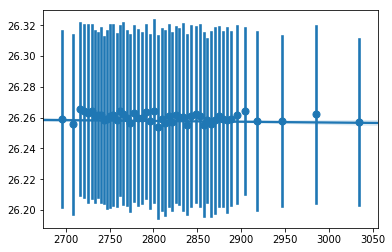

In [21]:
kw = {'x_estimator': np.median,
              'x_bins': 50,
             'x_ci': 'sd'}
sns.regplot(exp, mags1, **kw)

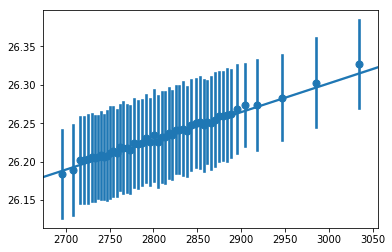

In [22]:
kw = {'x_estimator': np.median,
              'x_bins': 50,
             'x_ci': 'sd'}
sns.regplot(exp, mags2, **kw)

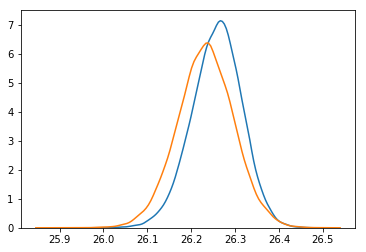

In [16]:
sns.kdeplot(mags1)
sns.kdeplot(mags2)

In [33]:
hdu = fits.open('../data/DF2/reduced/DF2_F814W_drc.fits')

In [34]:
mask = (hdu['REGIONS'].data == 1)
flux = hdu['SCI'].data[mask]
exp = hdu['WHT'].data[mask]

In [35]:
f = ppy.instrument.default_df2_filters()

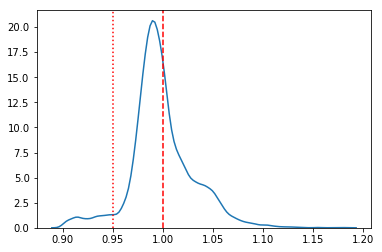

In [36]:
ax = sns.kdeplot(exp/f[0]._exposure)
ax.axvline(x=1.0, ls='--', color='r')
ax.axvline(x=0.95, ls=':', color='r')


In [ ]:
sns.kdeplot